In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from cycler import cycler
import numpy as np
import re

In [62]:
dfs = {
    'Baseline': pd.read_csv('results/Baseline_12-32-27_01-16-2023.csv'), 
    'Shamir sharing': pd.read_csv('results/Shamir_01-34-08_01-16-2023.csv'),
    'Bonawitz et al.': pd.read_csv('results/Bonawitz_05-25-36_01-14-2023.csv'),
    'Bell et al.': pd.read_csv('results/Bell_20-23-33_01-14-2023.csv'),   #(k=50)
    'Stevens et al.(Packed)': pd.read_csv('results/Masking_Packed_23-27-38_02-03-2023.csv'),
    'Stevens et al.': pd.read_csv('results/Masking_Interpolated_23-26-44_02-03-2023.csv'),
}


### 1. Set dimensions constant, vary #clients


In [63]:
# df_g = {k: df.groupby(['clients', 'dimension']) for k, df in dfs.items()}
dim = 100
df_c = {k: df[df['clients'] != 512] for k, df in dfs.items()}
df_dim = {k: df[df['dimension'] == dim] for k, df in df_c.items()}
df_g = {k: df.groupby(['clients']) for k, df in df_dim.items()}
means = {k: df.mean() for k, df in df_g.items()}
stds = {k: df.std() for k, df in df_g.items()}


def capitalizeWords(s):
  return re.sub(r'\w+', lambda m:m.group(0).capitalize(), s)

str = "avg client computation time (ms)" 

word_list = re.split(r'\(|\)', str)
capitalizeWords(word_list[0])+ '('+word_list[1]+')'

'Avg Client Computation Time (ms)'

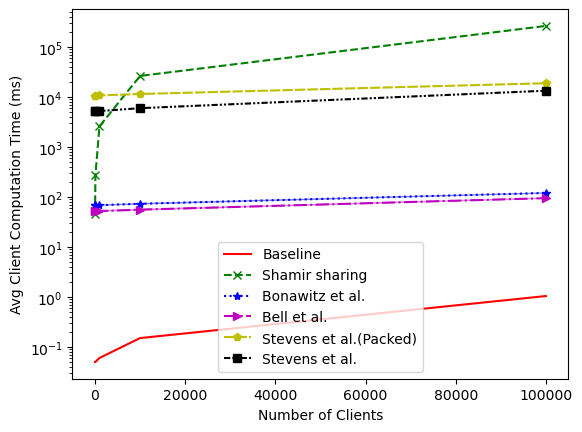

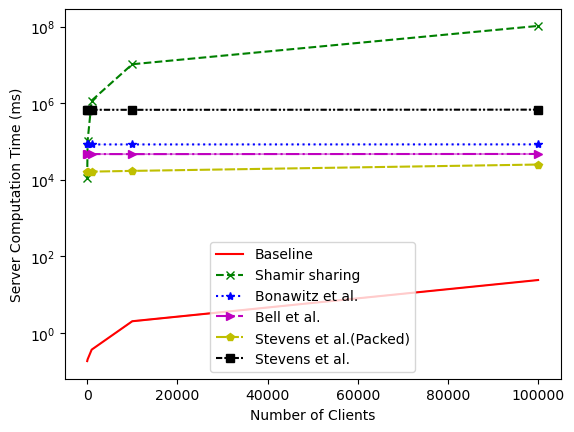

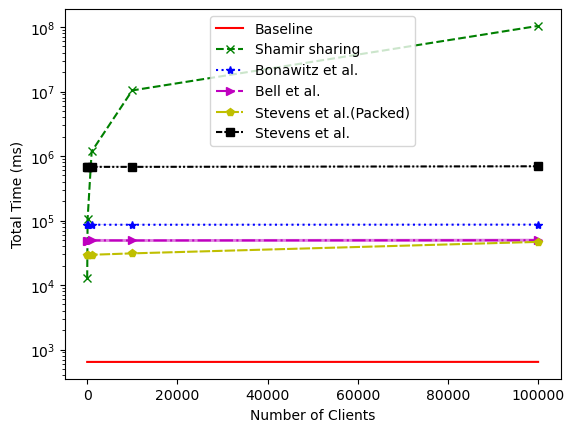

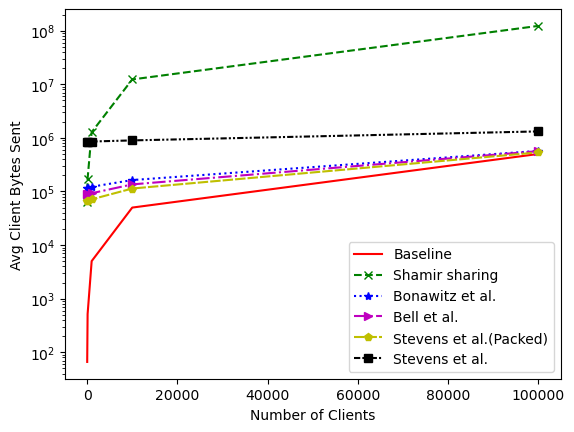

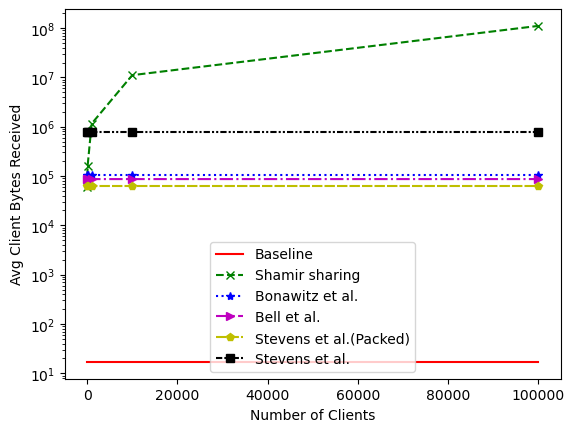

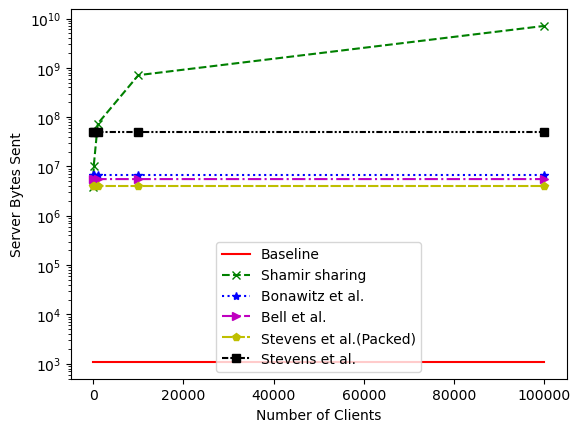

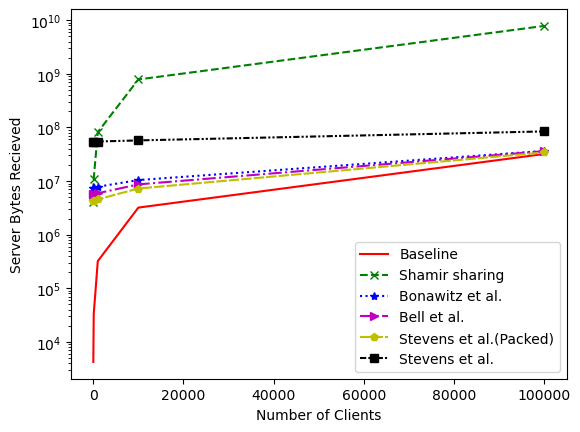

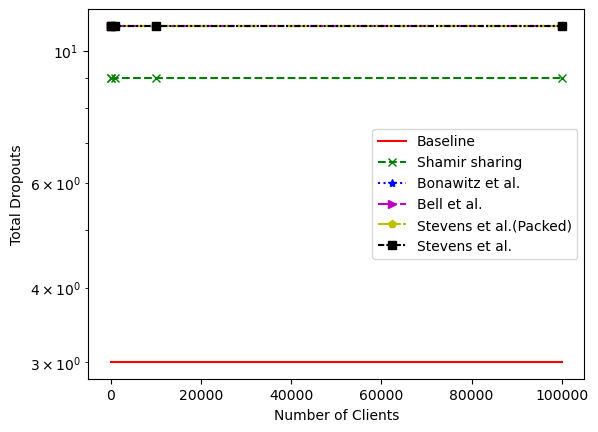

In [70]:
#plt.plot(means.index, means[' total time'], error=stds[' total time'])
lines = ["-","--","-.",":","***"]
from collections import OrderedDict

ls_cycler = cycler('linestyle',
                    [(0,()), # solid 
                     (0, (1, 10)), # loosely dotted
                     (0, (1, 5)), # dotted
                     (0, (1, 1)), # densely dotted
                     (0, (5, 10)), # loosely dashed
                     (0, (5, 5)), # dashed
                     (0, (5, 1)), # densely dashed
                     (0, (3, 10, 1, 10)), # loosely dashdotted
                     (0, (3, 5, 1, 5)), # dashdotted
                     (0, (3, 1, 1, 1)), # densely dashdotted
                     (0, (3, 10, 1, 10, 1, 10)), # loosely dashdotdotted
                     (0, (3, 5, 1, 5, 1, 5)), # dashdotdotted
                     (0, (3, 1, 1, 1, 1, 1))] # densely dashdotdotted
                  )

ls_cycler = cycler('linestyle',
                   ['-','--',':','-.',(0, (5, 1)),(0, (3, 1, 1, 1, 1, 1))])
color_cycler = cycler('color', 'rgbmyk')
marker ='.'
marker_cycler = cycler('marker', ['', 'x','*', '>', 'p', 's'])
# cycler('color', [plt.get_cmap('jet')(i/13) for i in range(13)] )

new_cycler = color_cycler + ls_cycler + marker_cycler

for c in ['avg client computation time (ms)', 'server computation time (ms)',
          'total time (ms)', 'avg client bytes sent', 'avg client bytes received',
          'server bytes sent', 'server bytes recieved', 'total dropouts']:
    
    plt.rcParams['axes.prop_cycle'] = new_cycler

    for k in dfs.keys():
        x = means[k].index
        y = means[k][c]# / 1000
        error = stds[k][c]# / 1000
        # linecycler = cycle(lines)
        plt.plot(x, y,label=k)
        # plt.plot(range(10),x,next(linecycler))
        plt.fill_between(x, y-error, y+error,
            alpha=.5, #edgecolor='#3F7F4C', facecolor='#7EFF99',
            linewidth=0)
    plt.xlabel('Number of Clients')
    word_list = re.split(r'\(|\)', c)
    if len(word_list) > 2:
        word = capitalizeWords(word_list[0])+ '('+word_list[1]+')'
    else:
        word = capitalizeWords(word_list[0])
    plt.ylabel(word)
    plt.legend()
    plt.yscale('log')
    plt.savefig(f"results/plots/client_{c}_results.pdf", dpi=400)
    plt.show()

## 2. Set clients constant, vary dimensions

In [75]:
# df_g = {k: df.groupby(['clients', 'dimension']) for k, df in dfs.items()}
clients = 64
df_c = {k: df[df['dimension'] != 10000000] for k, df in dfs.items()}
df_c = {k: df[df['dimension'] != 1000000] for k, df in df_c.items()}
# df_c = {k: df[df['dimension'] != 100000] for k, df in df_c.items()}
# df_c = {k: df[df['dimension'] != 10000] for k, df in df_c.items()}
# df_c = {k: df[df['dimension'] != 1000] for k, df in df_c.items()}
# df_c = {k: df[df['dimension'] != 100] for k, df in df_c.items()}
df_dim = {k: df[df['clients'] == clients] for k, df in df_c.items()}
df_g = {k: df.groupby(['dimension']) for k, df in df_dim.items()}
means = {k: df.mean() for k, df in df_g.items()}
stds = {k: df.std() for k, df in df_g.items()}

# means['Bonawitz'] #[[means['Bonawitz'] < 100]]
# means['Masking'] #[[means['Bonawitz'] < 100]]
# means['Shamir sharing']

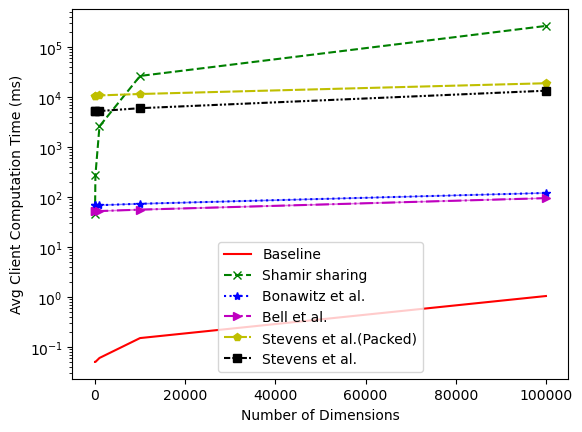

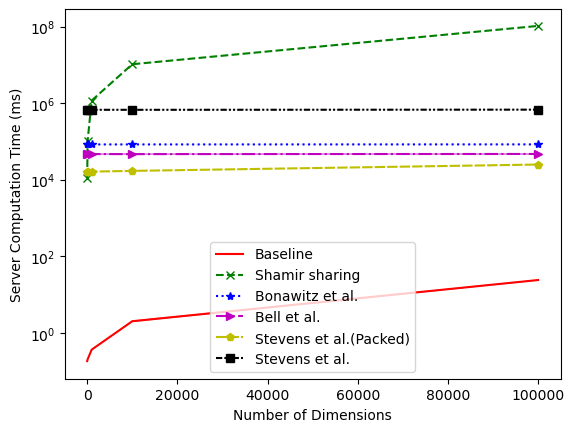

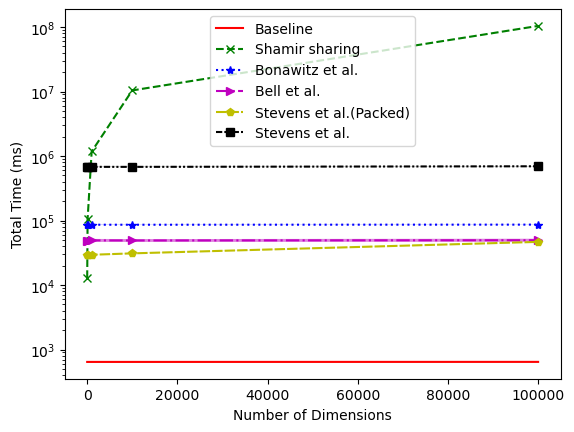

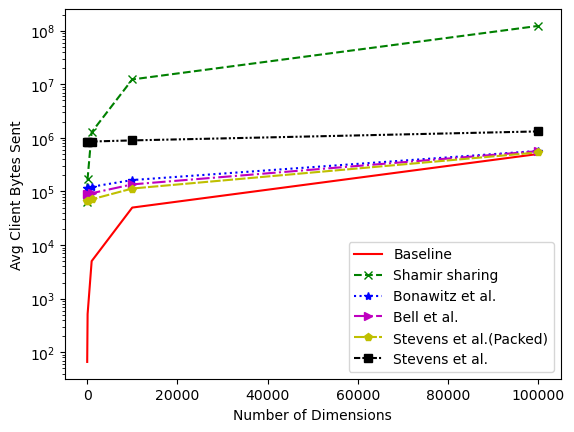

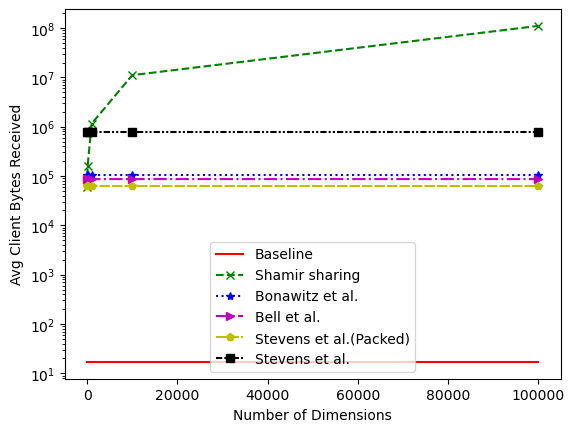

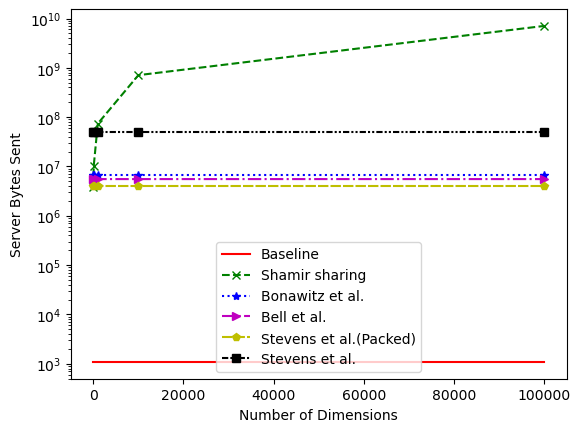

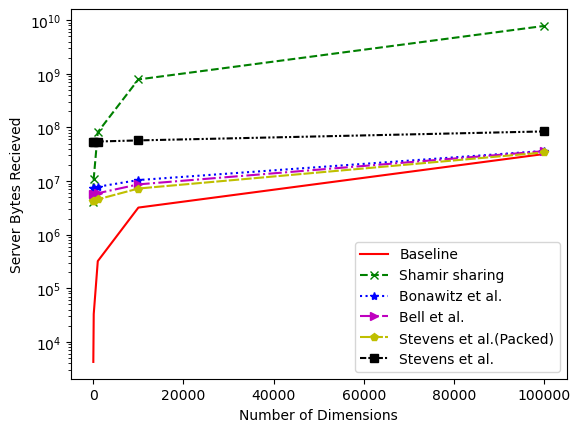

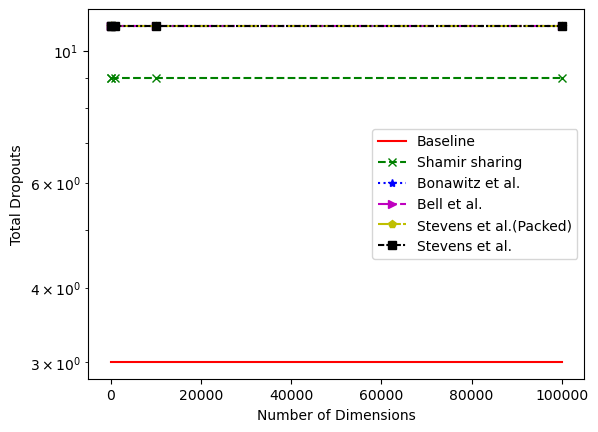

In [76]:

#plt.plot(means.index, means[' total time'], error=stds[' total time'])
for c in ['avg client computation time (ms)', 'server computation time (ms)',
          'total time (ms)', 'avg client bytes sent', 'avg client bytes received',
          'server bytes sent', 'server bytes recieved', 'total dropouts']:
    for k in dfs.keys():
        x = means[k].index
        y = means[k][c]# / 1000
        error = stds[k][c]# / 1000
        
        plt.rcParams['axes.prop_cycle'] = new_cycler
        plt.plot(x, y, label=k)
        plt.fill_between(x, y-error, y+error,
            alpha=.5, #edgecolor='#3F7F4C', facecolor='#7EFF99',
            linewidth=0)
    plt.xlabel('Number of Dimensions')
    word_list = re.split(r'\(|\)', c)
    if len(word_list) > 2:
        word = capitalizeWords(word_list[0])+ '('+word_list[1]+')'
    else:
        word = capitalizeWords(word_list[0])
    plt.ylabel(word)
    plt.yscale('log')
    plt.legend()
    # plt.savefig(f"results/plots/dim_{c}_results.pdf", dpi=400)

    # plt.savefig(f"results/plots/zoom_dim_{c}_results.pdf", dpi=400)
    plt.show()

### Large Values

In [77]:
dfs = {
    'Baseline': pd.read_csv('results/Baseline_Large_16-43-41_01-22-2023.csv'), 
    # 'Shamir sharing': pd.read_csv('final_results/shamir_00_27_33_10-11-2022.csv'),
    # 'Bonawitz': pd.read_csv('final_results/bonawitz_05_31_58_10-10-2022.csv'),
    'Bell et al.': pd.read_csv('results/Bell_Large_04-30-26_01-22-2023.csv'), 
}

### 1. Set dimensions constant, vary #clients

In [60]:
# df_g = {k: df.groupby(['clients', 'dimension']) for k, df in dfs.items()}
dim = 100
df_c = {k: df[df['clients'] != 100] for k, df in dfs.items()}
df_dim = {k: df[df['dimension'] == dim] for k, df in df_c.items()}
df_g = {k: df.groupby(['clients']) for k, df in df_dim.items()}
means = {k: df.mean() for k, df in df_g.items()}
stds = {k: df.std() for k, df in df_g.items()}

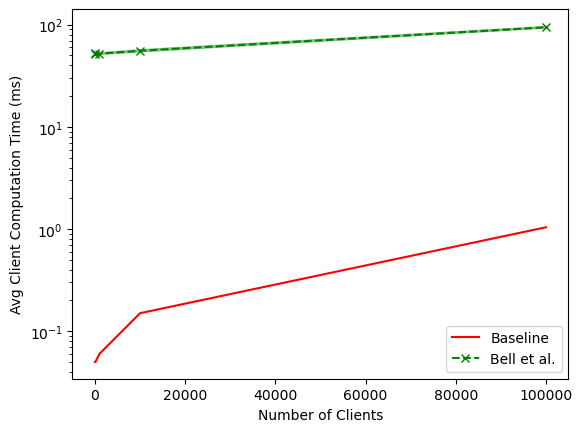

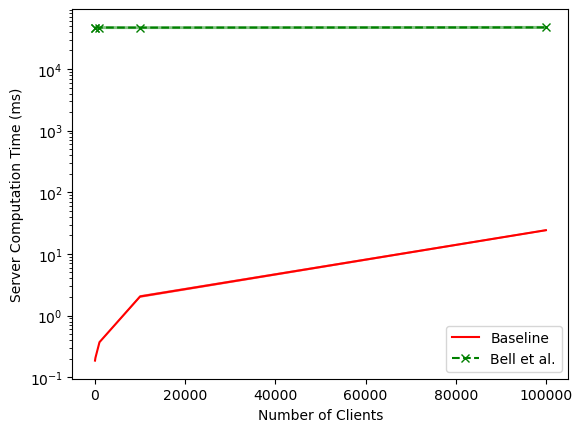

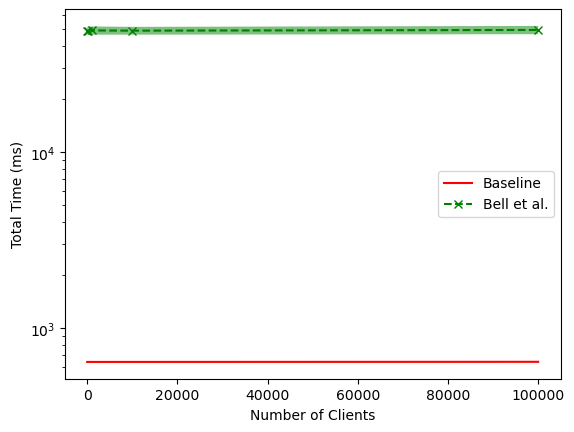

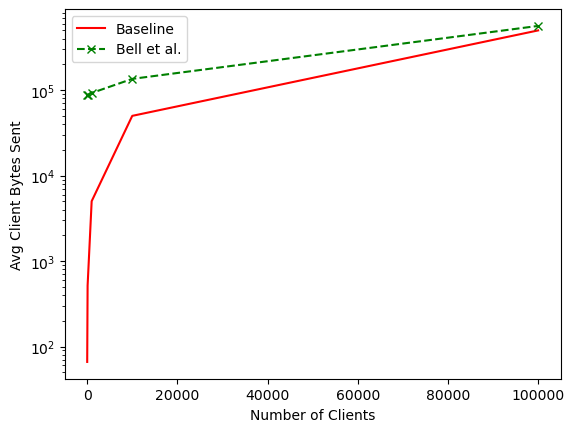

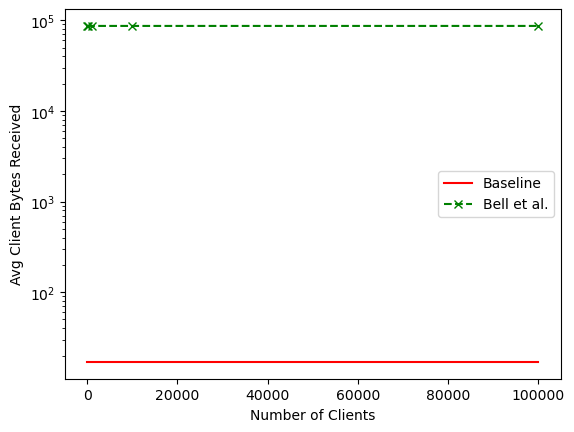

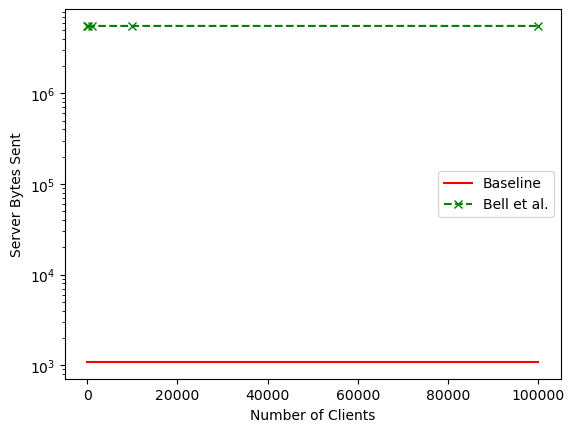

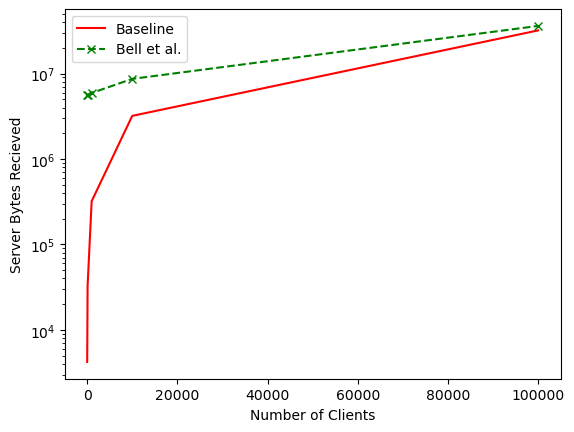

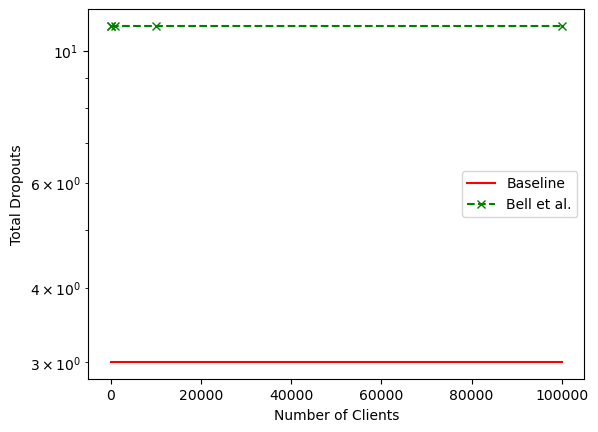

In [79]:
#plt.plot(means.index, means[' total time'], error=stds[' total time'])
for c in ['avg client computation time (ms)', 'server computation time (ms)',
          'total time (ms)', 'avg client bytes sent', 'avg client bytes received',
          'server bytes sent', 'server bytes recieved', 'total dropouts']:
    for k in dfs.keys():
        x = means[k].index
        y = means[k][c]# / 1000
        error = stds[k][c]# / 1000
        plt.rcParams['axes.prop_cycle'] = new_cycler
        plt.plot(x, y, label=k)
        plt.fill_between(x, y-error, y+error,
            alpha=.5, #edgecolor='#3F7F4C', facecolor='#7EFF99',
            linewidth=0)
    plt.xlabel('Number of Clients')
    
    word_list = re.split(r'\(|\)', c)
    if len(word_list) > 2:
        word = capitalizeWords(word_list[0])+ '('+word_list[1]+')'
    else:
        word = capitalizeWords(word_list[0])
    plt.ylabel(word)
    
    #plt.ylabel(c)
    plt.yscale('log')
    plt.legend()
    plt.savefig(f"results/plots/large_client_{c}_results.pdf", dpi=400)
    plt.show()

### Latency Experiments

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from cycler import cycler
import numpy as np
import re

In [2]:
high_dfs = {
    'Bonawitz et al.': pd.read_csv('results/High_Latency_Bonawitz_23-43-01_02-07-2023.csv'),
    'Bell et al.': pd.read_csv('results/High_Latency_Bell_23-43-43_02-07-2023.csv'),   #(k=50)
    'Stevens et al.(Packed)': pd.read_csv('results/High_Masking_Packed_23-43-49_02-07-2023.csv'),
    # 'Stevens et al.': pd.read_csv('results/High_Masking_Interpolated_17-18-20_02-06-2023.csv'),
}

low_dfs = {
    'Bonawitz et al.': pd.read_csv('results/Low_Latency_Bonawitz_23-41-51_02-07-2023.csv'),
    'Bell et al.': pd.read_csv('results/Low_Latency_Bell_23-41-58_02-07-2023.csv'),   #(k=50)
    'Stevens et al.(Packed)': pd.read_csv('results/Low_Masking_Packed_23-42-09_02-07-2023.csv'),
    # 'Stevens et al.': pd.read_csv('results/Low_Masking_Interpolated_15-10-30_02-06-2023.csv'),
}

# df_g = {k: df.groupby(['clients', 'dimension']) for k, df in dfs.items()}
dim = 100
df_c = {k: df[df['clients'] != 512] for k, df in high_dfs.items()}
df_dim = {k: df[df['dimension'] == dim] for k, df in df_c.items()}
df_g = {k: df.groupby(['clients']) for k, df in df_dim.items()}
means = {k: df.mean() for k, df in df_g.items()}
stds = {k: df.std() for k, df in df_g.items()}

df_c2 = {k: df[df['clients'] != 512] for k, df in low_dfs.items()}
df_dim2 = {k: df[df['dimension'] == dim] for k, df in df_c2.items()}
df_g2 = {k: df.groupby(['clients']) for k, df in df_dim2.items()}
means2 = {k: df.mean() for k, df in df_g2.items()}
stds2 = {k: df.std() for k, df in df_g2.items()}


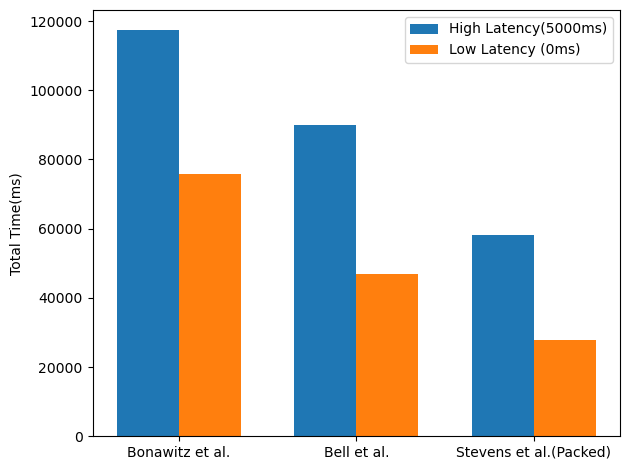

In [8]:
for num_of_clients in [64]: #[8, 16, 32, 64, 128]:
    high_total_times = {}
    low_total_times = {}
    for k in high_dfs.keys():
        high_total_times[k] = means[k]['total time (ms)'][num_of_clients]
        low_total_times[k] = means2[k]['total time (ms)'][num_of_clients]

    labels = list(high_total_times.keys())
    high_total_time = list(high_total_times.values())
    low_total_time  = list(low_total_times.values())

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, high_total_time, width, label='High Latency(5000ms)')
    rects2 = ax.bar(x + width/2, low_total_time, width, label='Low Latency (0ms)')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Total Time(ms)')
    # ax.set_title(f'Total Time for {num_of_clients} Clients and 100 Vector Dimension')
    ax.set_xticks(x, labels)
    ax.legend()

    # ax.bar_label(rects1, padding=3)
    # ax.bar_label(rects2, padding=3)

    fig.tight_layout()
    plt.savefig(f"results/latency_results_{num_of_clients}.pdf", dpi=400)
    plt.show()

    # Total Time for 64Clients and 100 Vector Dimension